In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [2]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
pwd

'/content/gdrive/My Drive/Kaggle'

Downloading the kaggle dataset

In [ ]:
!kaggle competitions download -c m5-forecasting-accuracy


  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 15.0MB/s]
 50% 8.00M/15.8M [00:00<00:00, 81.7MB/s]
100% 15.8M/15.8M [00:00<00:00, 77.3MB/s]
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 22.6MB/s]
 91% 13.0M/14.2M [00:00<00:00, 65.3MB/s]
100% 14.2M/14.2M [00:00<00:00, 69.6MB/s]
 90% 14.0M/15.5M [00:00<00:00, 59.1MB/s]
100% 15.5M/15.5M [00:00<00:00, 61.7MB/s]


In [ ]:
!ls

calendar.csv			sales_train_validation.csv.zip
kaggle.json			sample_submission.csv
new_calendar.csv		sample_submission.csv.zip
sales_train_evaluation.csv	sell_prices.csv
sales_train_evaluation.csv.zip	sell_prices.csv.zip
sales_train_validation.csv


Unzipping the CSV files

In [ ]:
!unzip sales_train_evaluation.csv.zip 

Archive:  sales_train_evaluation.csv.zip
  inflating: sales_train_evaluation.csv  


In [ ]:
!unzip sell_prices.csv.zip

Archive:  sell_prices.csv.zip
  inflating: sell_prices.csv         


In [ ]:
!unzip sales_train_validation.csv.zip

Archive:  sales_train_validation.csv.zip
  inflating: sales_train_validation.csv  


In [ ]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


**Import libraries**

# Import libraries

Import libraries

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer

from itertools import cycle
'''from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import mean_squared_error
from keras.layers import BatchNormalization
from keras.layers import LSTM'''


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



'from keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.metrics import mean_squared_error\nfrom keras.layers import BatchNormalization\nfrom keras.layers import LSTM'

In [ ]:
!ls

sample_data


Read data

# read data

In [ ]:
calendar= pd.read_csv('/content/gdrive/My Drive/Kaggle/calendar.csv')
prices= pd.read_csv('/content/gdrive/My Drive/Kaggle/sell_prices.csv')
sales_train_evaluation= pd.read_csv('/content/gdrive/My Drive/Kaggle/sales_train_evaluation.csv')
#sales_train_validation= pd.read_csv('/content/gdrive/My Drive/Kaggle/sales_train_validation.csv')

In [ ]:
sales_train_validation= pd.read_csv('/content/gdrive/My Drive/Kaggle/sales_train_validation.csv')

In [ ]:
print("Calendar shape: ", calendar.shape)
print("prices shape: ",prices.shape)
print("sales shape : ", sales_train_evaluation.shape)
#print("sales validation shape: " , sales_train_validation.shape)

Calendar shape:  (1969, 14)
prices shape:  (6841121, 4)
sales shape :  (30490, 1947)


Initial data analysis

# Initial Data Analysis

**Calendar.csv**

In [ ]:
calendar.info

<bound method DataFrame.info of             date  wm_yr_wk    weekday  ...  snap_CA  snap_TX  snap_WI
0     2011-01-29     11101   Saturday  ...        0        0        0
1     2011-01-30     11101     Sunday  ...        0        0        0
2     2011-01-31     11101     Monday  ...        0        0        0
3     2011-02-01     11101    Tuesday  ...        1        1        0
4     2011-02-02     11101  Wednesday  ...        1        0        1
...          ...       ...        ...  ...      ...      ...      ...
1964  2016-06-15     11620  Wednesday  ...        0        1        1
1965  2016-06-16     11620   Thursday  ...        0        0        0
1966  2016-06-17     11620     Friday  ...        0        0        0
1967  2016-06-18     11621   Saturday  ...        0        0        0
1968  2016-06-19     11621     Sunday  ...        0        0        0

[1969 rows x 14 columns]>

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
calendar.isna().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [ ]:
calendar.isnull()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,False,False,False,False,False,False,False,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,False,False,False,False,False,False,False,True,True,True,True,False,False,False
1965,False,False,False,False,False,False,False,True,True,True,True,False,False,False
1966,False,False,False,False,False,False,False,True,True,True,True,False,False,False
1967,False,False,False,False,False,False,False,True,True,True,True,False,False,False


As we see there are clouumns like event_name,event_type and snap , have missing/null values lets take count from each.

In [ ]:
print('Total No. of missing value in event_name_1: ' ,calendar['event_name_1'].isna().sum())
print('Total No. of missing value in event_type_1: ' ,calendar['event_type_1'].isna().sum())
print('Total No. of missing value in event_name_2: ' ,calendar['event_name_2'].isna().sum())
print('Total No. of missing value in event_type_2: ' ,calendar['event_type_2'].isna().sum())

Total No. of missing value in event_name_1:  1807
Total No. of missing value in event_type_1:  1807
Total No. of missing value in event_name_2:  1964
Total No. of missing value in event_type_2:  1964


In [ ]:
print('No. of 0&1 in snap_CA')
print(calendar['snap_CA'].value_counts())
print('\n')
print('No. of 0&1 in snap_TX')
print(calendar['snap_TX'].value_counts())
print('\n')
print('No. of 0&1 for in snap_WI')
print(calendar['snap_WI'].value_counts())

No. of 0&1 in snap_CA
0    1319
1     650
Name: snap_CA, dtype: int64


No. of 0&1 in snap_TX
0    1319
1     650
Name: snap_TX, dtype: int64


No. of 0&1 for in snap_WI
0    1319
1     650
Name: snap_WI, dtype: int64


In [ ]:
print('Date Start: ' + str(min(calendar['date'])))
print('Date Start: ' + str(max(calendar['date'])))
print('\n')
print('No. of Unique days')
print(calendar['weekday'].value_counts())
print('\n')
print('No. of Unique year')
print(calendar['year'].value_counts())

Date Start: 2011-01-29
Date Start: 2016-06-19


No. of Unique days
Sunday       282
Saturday     282
Wednesday    281
Friday       281
Monday       281
Tuesday      281
Thursday     281
Name: weekday, dtype: int64


No. of Unique year
2012    366
2015    365
2014    365
2013    365
2011    337
2016    171
Name: year, dtype: int64


**Prices.csv**

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [ ]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [ ]:
round(prices['sell_price'].describe(),2)

count    6841121.00
mean           4.41
std            3.41
min            0.01
25%            2.18
50%            3.47
75%            5.84
max          107.32
Name: sell_price, dtype: float64

In prices.csv, each row represent each item's sell_price across all store in each week.The data includes sell price from at day 1 to day 1969 (all validation and eveluation data).The maximium sell_price is much higher than the mean and median, and it suggests the data contains outliers

**Sales-train**

In [ ]:
sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int16(1317), int8(624), object(6)
memory usage: 96.1+ MB


# Data Preprocessing

In [ ]:
#Add zero sales for the remaining days 1942-1969
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales_train_evaluation[col] = 0
    sales_train_evaluation[col] = sales_train_evaluation[col].astype(np.int16)

In [ ]:
sales_bd = np.round(sales_train_evaluation.memory_usage().sum()/(1024*1024),1)
#calendar_bd = np.round(calendar.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)

I'll be downcasting the dataframes to reduce the amount of storage used by them and also to expidite the operations performed on them.

**Numerical Columns:** Depending on your environment, pandas automatically creates int32, int64, float32 or float64 columns for numeric ones. If you know the min or max value of a column, you can use a subtype which is less memory consuming. You can also use an unsigned subtype if there is no negative value. Here are the different subtypes you can use: int8 / uint8 : consumes 1 byte of memory, range between -128/127 or 0/255 bool : consumes 1 byte, true or false float16 / int16 / uint16: consumes 2 bytes of memory, range between -32768 and 32767 or 0/65535 float32 / int32 / uint32 : consumes 4 bytes of memory, range between -2147483648 and 2147483647 float64 / int64 / uint64: consumes 8 bytes of memory If one of your column has values between 1 and 10 for example, you will reduce the size of that column from 8 bytes per row to 1 byte, which is more than 85% memory saving on that column

**Categorical Columns:** Pandas stores categorical columns as objects. One of the reason this storage is not optimal is that it creates a list of pointers to the memory address of each value of your column. For columns with low cardinality (the amount of unique values is lower than 50% of the count of these values), this can be optimized by forcing pandas to use a virtual mapping table where all unique values are mapped via an integer instead of a pointer. This is done using the category datatype.

In [ ]:
#Downcast in order to save memory
def transform (df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        '''elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')'''
    return df  

sales_train_evaluation = transform(sales_train_evaluation)
prices = transform(prices)
#calendar = transform(calendar)
#sales_train_validation = transform(sales_train_evaluation)

In [ ]:
sales_ad = np.round(sales_train_evaluation.memory_usage().sum()/(1024*1024),1)
#calendar_ad = np.round(calendar.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)

In [ ]:

dic = {'DataFrame':['sales_train_evaluation','price'],
       'Before downcasting':[sales_bd,prices_bd],
       'After downcasting':[sales_ad,prices_ad]}
memory = pd.DataFrame(dic)
memory = pd.melt(memory, id_vars='DataFrame', var_name='Status', value_name='Memory (MB)')
memory.sort_values('Memory (MB)',inplace=True)
fig = px.bar(memory, x='DataFrame', y='Memory (MB)', color='Status', barmode='group', text='Memory (MB)')
fig.update_traces(texttemplate='%{text} MB', textposition='outside')
fig.update_layout(template='seaborn', title='Effect of Downcasting')
fig.show()

check the sales_train size after downcaast it has reduced from 496+MB to 96.1+MB

In [ ]:
sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int16(1317), int8(624), object(6)
memory usage: 96.1+ MB


In [ ]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


# EDA

**Visualization of single product item from sales-train-evaluation**

I'm taking a random item that sell a lot, to check how it's sales look across the training data.As per my oberservation FOODS_3_090_CA_3_evaluation sells a lot.
Note there are days where it appears the item is unavailable and sales flatline

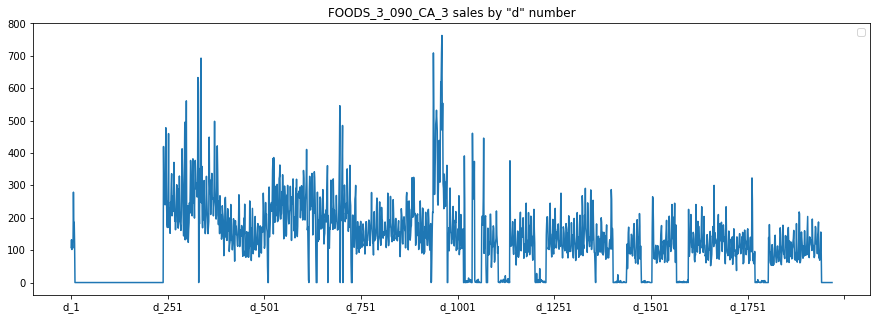

In [ ]:
d_cols = [c for c in sales_train_evaluation.columns if 'd_' in c] # sales data columns

# Below we are chaining the following steps in pandas:
# 1. Select the item.
# 2. Set the id as the index, Keep only sales data columns
# 3. Transform so it's a column
# 4. Plot the data
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
sales_train_evaluation.loc[sales_train_evaluation['id'] == 'FOODS_3_090_CA_3_evaluation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "d" number',
          color=next(color_cycle))
plt.legend('')
plt.show()

**Category-wise Distribution**

In [ ]:
sales_train_evaluation['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

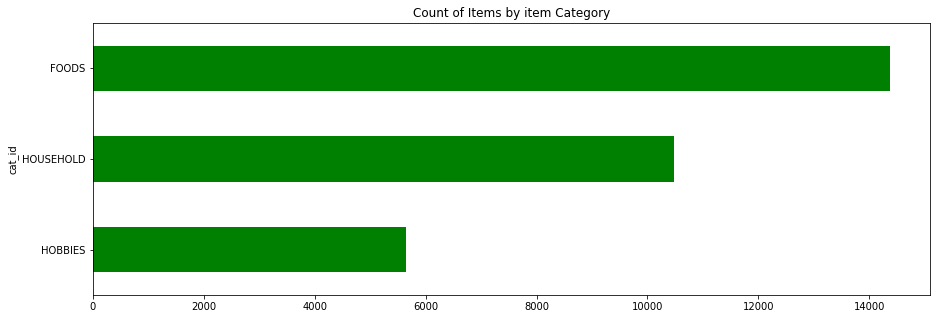

In [ ]:
sales_train_evaluation.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by item Category' ,color='g' )
plt.show()

**Mergering sales-training data with calender to get insights with real dates**

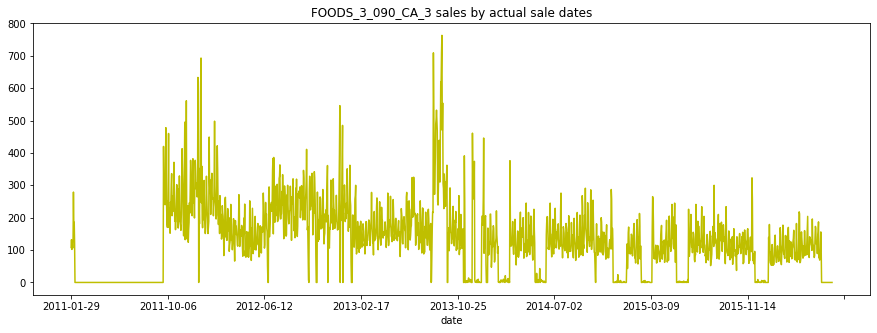

In [ ]:

# Merge calendar on our items' data
example = sales_train_evaluation.loc[sales_train_evaluation['id'] == 'FOODS_3_090_CA_3_evaluation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(calendar , how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color='y',
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

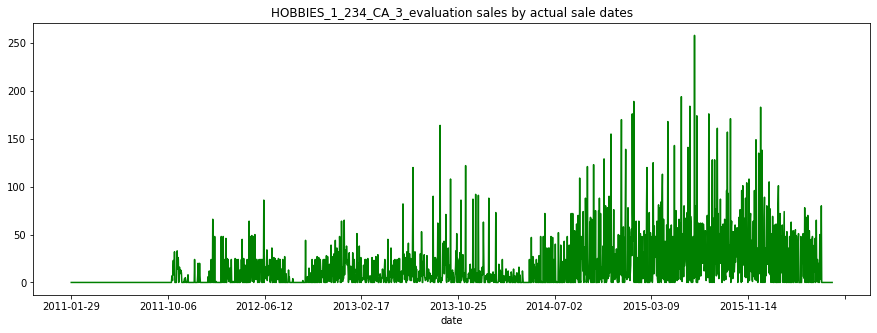

In [ ]:

# Select more top selling examples
example2 = sales_train_evaluation.loc[sales_train_evaluation['id'] == 'HOBBIES_1_234_CA_3_evaluation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3_evaluation'}) # Name it correctly
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(calendar, how='left', validate='1:1')
example2.set_index('date')['HOBBIES_1_234_CA_3_evaluation'] \
    .plot(figsize=(15, 5),
          color='g',
          title='HOBBIES_1_234_CA_3_evaluation sales by actual sale dates')
plt.show()

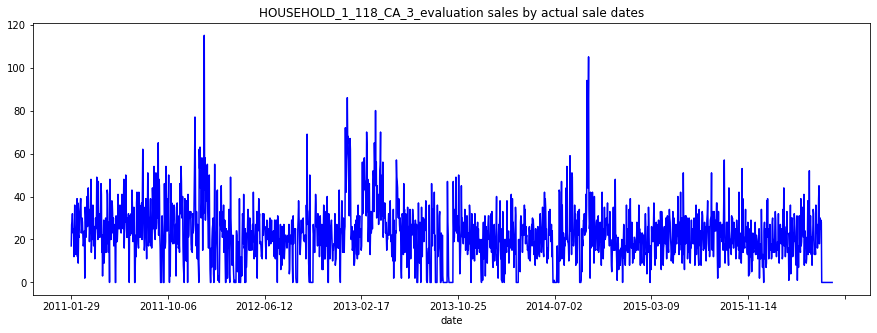

In [ ]:
example3 = sales_train_evaluation.loc[sales_train_evaluation['id'] == 'HOUSEHOLD_1_118_CA_3_evaluation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3_evaluation'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(calendar, how='left', validate='1:1')

example3.set_index('date')['HOUSEHOLD_1_118_CA_3_evaluation'] \
    .plot(figsize=(15, 5),
          color='b',
          title='HOUSEHOLD_1_118_CA_3_evaluation sales by actual sale dates')
plt.show()

**Sales Distribution Over time(Days /Month/ Year)**

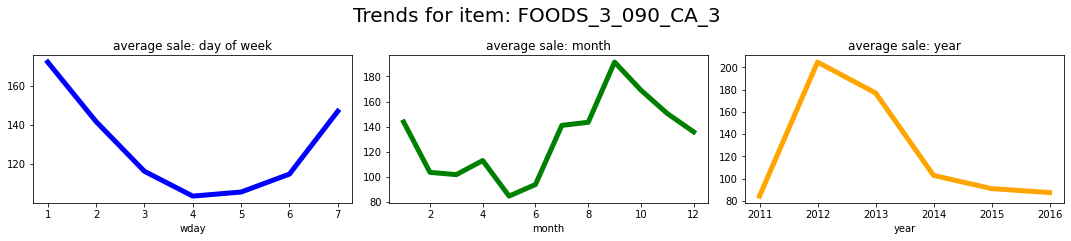

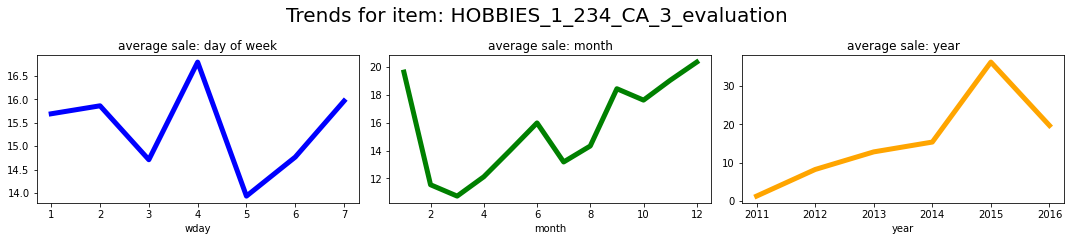

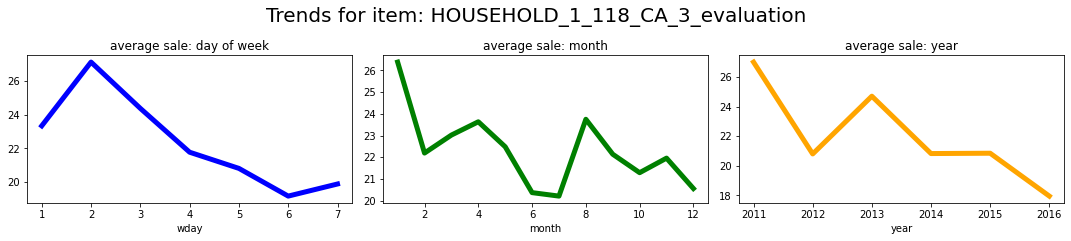

In [ ]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3_evaluation','HOUSEHOLD_1_118_CA_3_evaluation']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color='b',
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color='g',

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color='orange',

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()



**Sales Distribtion of multiple products over years**

In [ ]:

ten_examples = sales_train_evaluation.sample(10, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

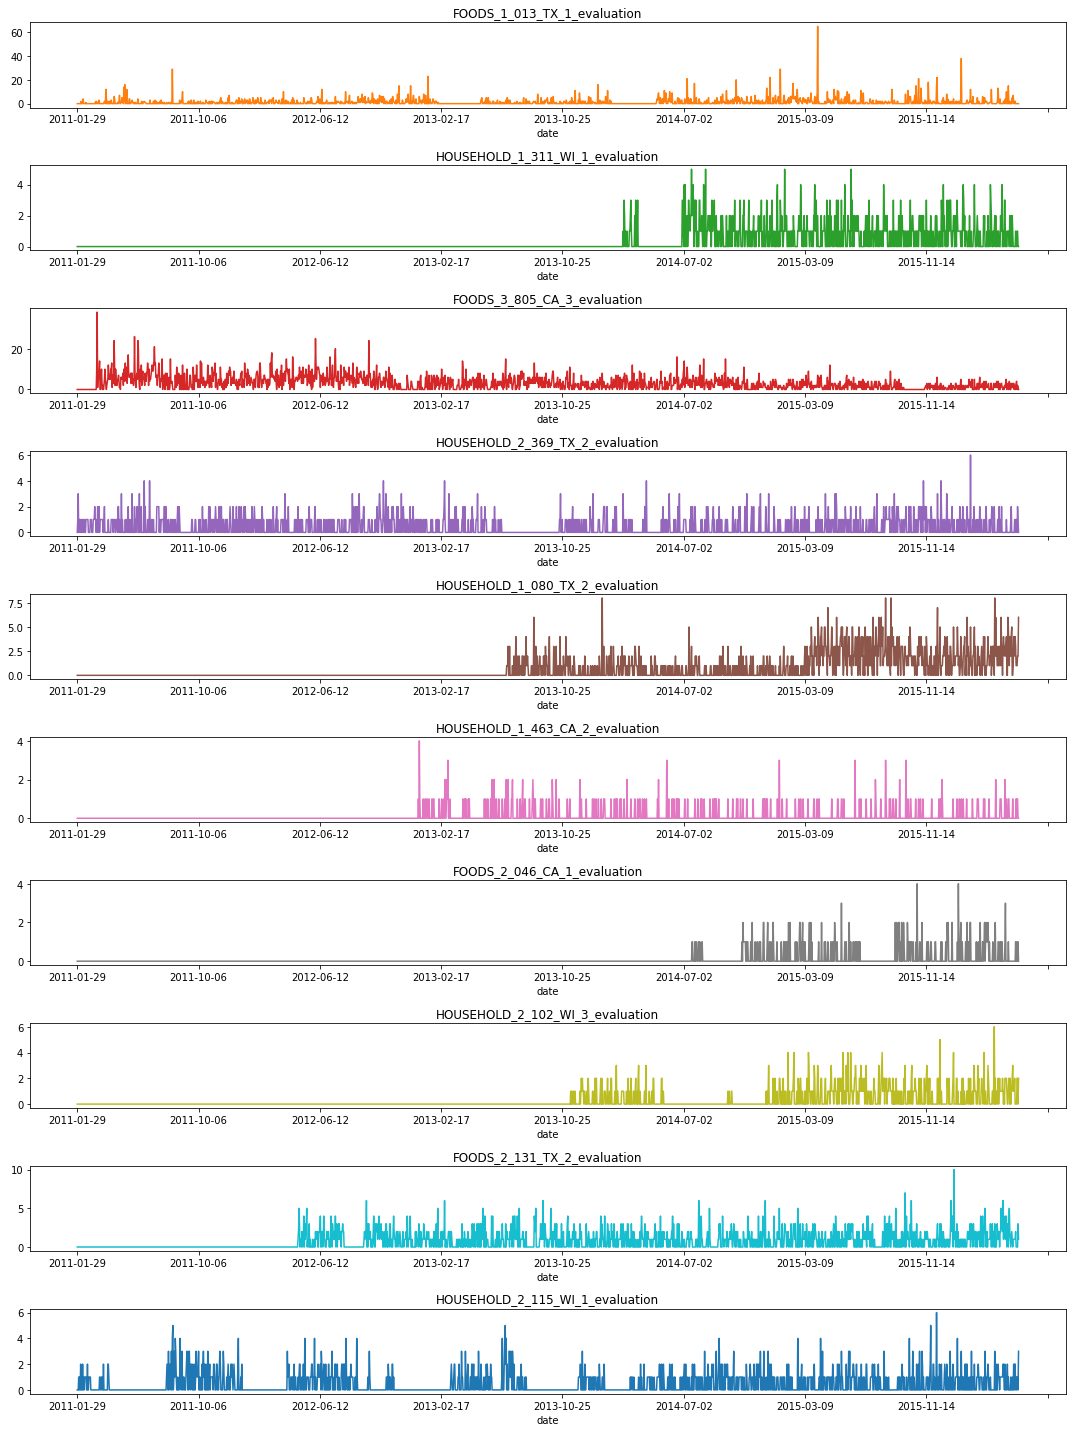

In [ ]:

fig, axs = plt.subplots(10, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in ten_examples.columns:
    ten_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

Some observations from these plots:
* It is common to see an item unavailable for a period of time.
* Some items only sell 1 or less in a day, making it very hard to predict.
* Other items show spikes in their sales demand, possibly the "events" provided to us could help with these.

**Past Sales Trends**

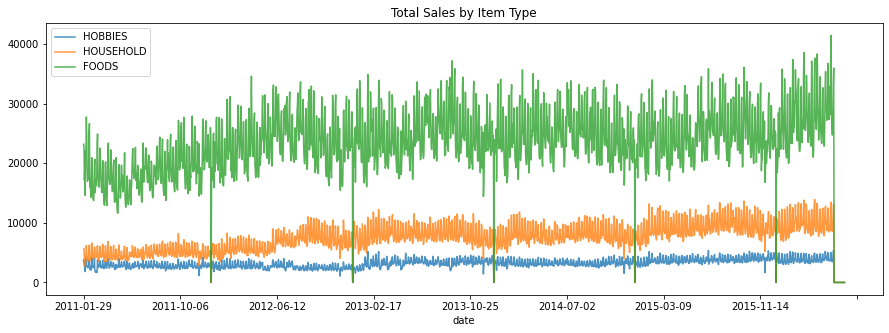

In [ ]:
past_sales = sales_train_evaluation.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in sales_train_evaluation['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(sales_train_evaluation['cat_id'].unique())
plt.show()

We can see the some items come into supply that previously didn't exist. Similarly some items stop being sold completely.


In [ ]:
sales_train_evaluation.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,4,0,0,0,0,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
calendar.head(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
temp_series = sales_train_evaluation.groupby(["cat_id", "wday"])["value"].sum()
temp_series

In [ ]:
plt.figure(figsize=(6, 4))
left = np.arange(1,8) 
width = 0.3
weeklabel = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]    


plt.bar(left, temp_series[temp_series.index.get_level_values("cat_id") == "FOODS"].values, width=width, label="FOODS")
plt.bar(left + width, temp_series[temp_series.index.get_level_values("cat_id") == "HOUSEHOLD"].values, width=width, label="HOUSEHOLD")
plt.bar(left + width + width, temp_series[temp_series.index.get_level_values("cat_id") == "HOBBIES"].values, width=width, label="HOBBIES")
plt.legend(bbox_to_anchor=(1.01, 1.01))
plt.xticks(left, weeklabel, rotation=60)
plt.xlabel("day of week")
plt.ylabel("# of sold items")
plt.title("Total sold item in each daytype")


Now we check sales in past years

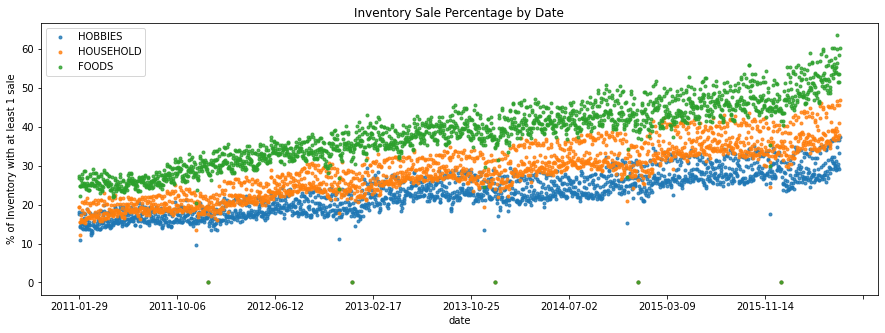

In [ ]:
past_sales_clipped = past_sales.clip(0, 1) # only count if item is selling or not selling (0 -> not selling, >0 -> selling)
for i in sales_train_evaluation['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    (past_sales_clipped[items_col] \
        .mean(axis=1) * 100) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Inventory Sale Percentage by Date',
              style='.')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(sales_train_evaluation['cat_id'].unique())
plt.show()


This plot shows us that many items are being slowly introduced into inventory, so many of them will not register a sale at the beginning of the provided data.

We are provided data for 10 unique stores. So we will see the sales in there stores in last 120 days(4 months)

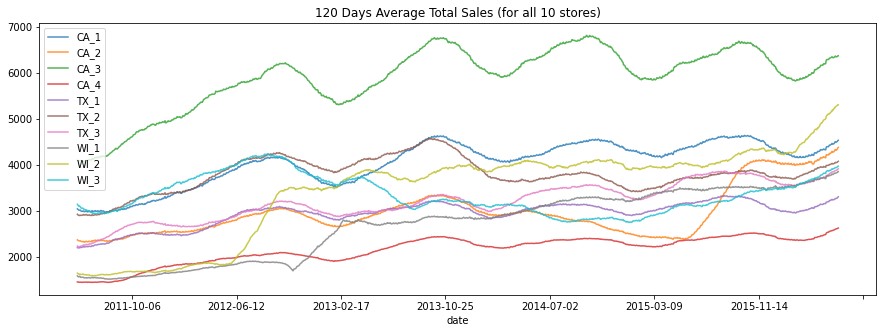

In [ ]:
store_list = prices['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(120).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='120 Days Average Total Sales (for all 10 stores)')
plt.legend(store_list)
plt.show()




Note that some stores are more steady than others.
CA_2 seems to have a big change occur in 2015

 verifying the sales in past year 

In [ ]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0],
     'with', past_sales.sum(axis=1).sort_values().values[0], 'sales')
print('The highest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0],
     'with', past_sales.sum(axis=1).sort_values(ascending=False).values[0], 'sales')

The lowest sale date was: 2016-06-19 with 0 sales
The highest sale date was: 2016-05-15 with 59921 sales


We can see the sales were zero on 25th dec2016 , which means stores were closed on Chirstmas day. The highest demand day of all the data was on Sunday March 6th, 2016

In [ ]:
sales_train_evaluation.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0


In [ ]:
past_sales1 = sales_train_evaluation.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

store_list = prices['store_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Average Sales vs. Time (per store)")


In [ ]:
fig = go.Figure()

for i, s in enumerate(store_list):
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name ")

The above plot compares the sales distribution for each store in the dataset. The stores in California seem to have the highest variance in sales, which might indicate that some places in California grow significantly faster than others, i.e. there is development disparity. On the other hand, the Wisconsin and Texas sales seem to be quite consistent among themselves, without much variance. This indicates that development might be more uniform in these states. Moreover, the California stores also seem to have the highest overall mean sales.

In [ ]:
import plotly
sales_df

'4.9.0'

In [ ]:
pip install plotly==4.9.0

     |████████████████████████████████| 12.9MB 316kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px
group = sales_train_evaluation.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)['item_id'].count().dropna()
group['USA'] = 'United States of America'
group.rename(columns={'state_id':'State','store_id':'Store','cat_id':'Category','dept_id':'Department','item_id':'Count'},inplace=True)

fig = px.treemap(group, path=['USA', 'State', 'Store', 'Category', 'Department'], values='Count',
                  color='Count',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Walmart: Distribution of items')
#fig.update_layout(template='seaborn')
fig.show()

In [ ]:
sales_train_evaluation.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,d_1942,d_1943,d_1944,d_1945,d_1946,d_1947,d_1948,d_1949,d_1950,d_1951,d_1952,d_1953,d_1954,d_1955,d_1956,d_1957,d_1958,d_1959,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,4,0,0,0,0,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#temp1
temp_series = sales_train_evaluation.groupby(["store_id", "cat_id"])["id"].sum()

In [ ]:
#temp1
store_id_list_by_state = [["CA_1", "CA_2", "CA_3", "CA_4"], ["TX_1", "TX_2", "TX_3"], ["WI_1", "WI_2", "WI_3"]] 

In [ ]:
  #temp
   fig, axs = plt.subplots(3, 4, figsize=(10, 7), sharey=True) 

for row in range(len(store_id_list_by_state)):
    for col in range(len(store_id_list_by_state[row])):
        axs[row, col].bar(x=temp_series[temp_series.index.get_level_values("store_id") == store_id_list_by_state[row][col]].index.get_level_values("cat_id"),
                          height=temp_series[temp_series.index.get_level_values("store_id") == store_id_list_by_state[row][col]].values,
                         color=["orange", "green", "blue"], label=["FOODS", "HOBBIES", "HOUSEHOLD"])
        axs[row, col].set_title(store_id_list_by_state[row][col])
        axs[row, col].set_ylabel("# of items")

fig.suptitle("Each category item sold in each store")

**State wise analysis**

In this section, I will be analyzing the sales and revenue of all the stores individually across all the three states: California, Texas & Wisconsin.

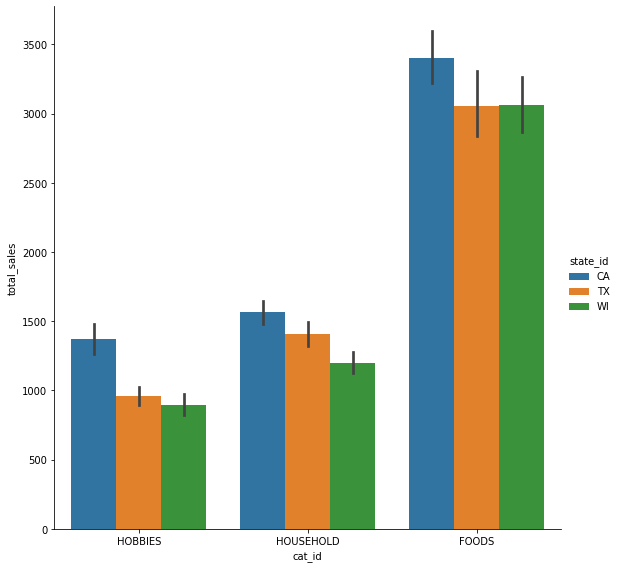

In [ ]:
sales_train_evaluation['total_sales'] = sales_train_evaluation.sum(axis=1)
sns.catplot(x="cat_id", y="total_sales",
                hue="state_id",
                data=sales_train_evaluation, kind="bar",
                height=8, aspect=1);

observe sales at the scale of state
* California generally has better salls than the other two states.
* Apart from foods Texas is better than Wisconsin


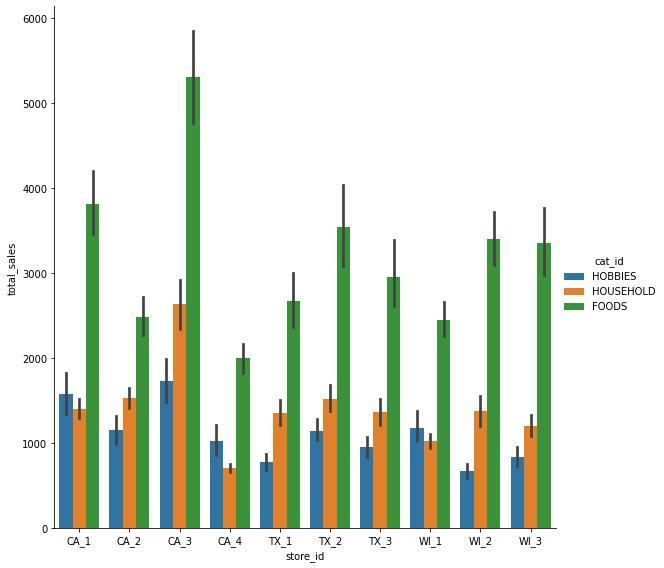

In [ ]:
sns.catplot(x="store_id", y="total_sales",
                hue="cat_id",
                data=sales_train_evaluation, kind="bar",
                height=8, aspect=1);

Eventhough, California has the best sales, only CA_3 store has an out standing sales. The rest of California stores are just the same as other states, or even has the least sales(CA_4).
It is quite interesting to see that, even in lease populated states, Walmart still manage to reach certain sales. Perhaps the location and the number of stores in the area are the real factors.

**Prices Wise :**

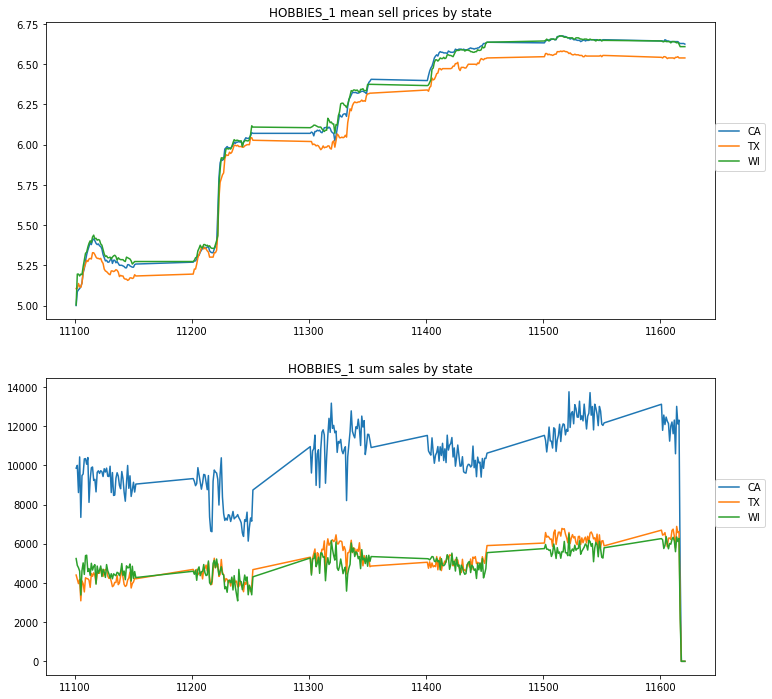

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
hobbies_1_prices = prices.loc[prices['item_id'].str.contains('HOBBIES_1')]
hobbies_1_prices_CA = hobbies_1_prices.loc[hobbies_1_prices['store_id'].str.contains('CA')]
hobbies_1_prices_TX = hobbies_1_prices.loc[hobbies_1_prices['store_id'].str.contains('TX')]
hobbies_1_prices_WI = hobbies_1_prices.loc[hobbies_1_prices['store_id'].str.contains('WI')]
grouped_CA = hobbies_1_prices_CA.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = hobbies_1_prices_TX.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = hobbies_1_prices_WI.groupby(['wm_yr_wk'])['sell_price'].mean()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('HOBBIES_1 mean sell prices by state');
plt.subplot(2,1,2)
cal = calendar[['wm_yr_wk', 'd']]
cal = cal.rename(columns={"d": "index"})
hobbies_1 = sales_train_evaluation.loc[sales_train_evaluation['item_id'].str.contains('HOBBIES_1')]
hobbies_1_CA = hobbies_1.loc[hobbies_1['store_id'].str.contains('CA')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_1_TX = hobbies_1.loc[hobbies_1['store_id'].str.contains('TX')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_1_WI = hobbies_1.loc[hobbies_1['store_id'].str.contains('WI')].drop(columns = ['id','item_id','dept_id','cat_id','store_id','state_id']).sum().reset_index().drop(1913)
hobbies_1_CA = pd.merge(hobbies_1_CA, cal, on='index')
hobbies_1_TX = pd.merge(hobbies_1_TX, cal, on='index')
hobbies_1_WI = pd.merge(hobbies_1_WI, cal, on='index')
grouped_CA = hobbies_1_CA.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_CA.index, grouped_CA.values, label="CA")
grouped_TX = hobbies_1_TX.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_TX.index, grouped_TX.values, label="TX")
grouped_WI = hobbies_1_WI.drop(columns = "index").groupby(['wm_yr_wk']).sum()
plt.plot(grouped_WI.index, grouped_WI.values, label="WI")
plt.legend(loc=(1.0, 0.5))
plt.title('HOBBIES_1 sum sales by state');

The upper graph shows the prices of hobbies_1 through the time series. The lower graph shows the sales through the time series

In [ ]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id','total_sales'], var_name='d', value_name='sold').dropna()

# Result Comparision for all models (After evaluating RMSE)

In [4]:

result= pd.read_csv('/content/gdrive/My Drive/Model_comparision.csv')

In [18]:
result

,Model Name,RMSE Value
0,LSTM Model,1.672910
1,Sequence to Sequence Model,1.361540
2,LGBM Model,0.326443


In [25]:
result.columns = ["Model","RMSE Value"]
px.bar(result, y="RMSE Value", x="Model", color="Model", title="RMSE Loss vs. Model")